In [23]:
import pandas as pd
import psycopg2
from config import *
import seaborn as sn
import matplotlib.pyplot as plt
import re

In [2]:
conn = psycopg2.connect(
   database=DATABASE, user=USER, password=PASSWORD, host=HOST, port= PORT
)

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("Select * FROM races LIMIT 0")
colnames = [desc[0] for desc in cursor.description]
colnames

['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url']

In [5]:
cursor.execute("SELECT * FROM races")
data = cursor.fetchall()
race_df = pd.DataFrame(data, columns=colnames)
race_df.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [6]:
cursor.execute("Select * FROM results LIMIT 0")
colnames = [desc[0] for desc in cursor.description]
colnames

['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'number',
 'grid',
 'position',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId']

In [7]:
cursor.execute("SELECT * FROM results")
data = cursor.fetchall()
results_df = pd.DataFrame(data, columns=colnames)
results_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [8]:
filepath = "../Resources/Dataset/status_updated.csv"
status_df = pd.read_csv(filepath)
status_df.head()

,statusId,status,Description
0,1,Finished,Finished
1,2,Disqualified,DQed
2,3,Accident,Accident
3,4,Collision,Accident
4,5,Engine,Engine


In [9]:
raceresults_df = results_df.merge(race_df,left_on='raceId',right_on='raceId',how='left')
raceresults_df = raceresults_df.dropna().reset_index()
raceresults_df

,index,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,...,fastestLapTime,fastestLapSpeed,statusId,year,round,circuitId,name,date,time_y,url
0,0,1,18,1,1,22,1,1,1,1,...,1:27.452,218.300,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,1,2,18,2,2,3,5,2,2,2,...,1:27.739,217.586,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,2,3,18,3,3,7,7,3,3,3,...,1:28.090,216.719,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,3,4,18,4,4,5,11,4,4,4,...,1:28.603,215.464,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,4,5,18,5,1,23,3,5,5,5,...,1:27.418,218.385,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,25035,25041,1055,849,3,6,19,16,16,16,...,1:22.905,203.003,11,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
25036,25036,25042,1055,4,214,14,10,17,17,17,...,1:21.182,207.311,11,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
25037,25037,25043,1055,854,210,47,18,18,18,18,...,1:22.637,203.661,12,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
25038,25038,25044,1055,853,210,9,20,19,19,19,...,1:24.040,200.261,12,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...


In [10]:
raceresults_df.drop(columns=['url','time_y','date','round','round','positionText','position','number','points','laps','time_x','milliseconds','fastestLap','rank'],inplace=True)
raceresults_df = raceresults_df.merge(status_df,left_on='statusId',right_on='statusId',how='left')
raceresults_df = raceresults_df.reset_index().drop(columns=['level_0','index'])
raceresults_df

,resultId,raceId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,statusId,year,circuitId,name,status,Description
0,1,18,1,1,1,1,1:27.452,218.300,1,2008,1,Australian Grand Prix,Finished,Finished
1,2,18,2,2,5,2,1:27.739,217.586,1,2008,1,Australian Grand Prix,Finished,Finished
2,3,18,3,3,7,3,1:28.090,216.719,1,2008,1,Australian Grand Prix,Finished,Finished
3,4,18,4,4,11,4,1:28.603,215.464,1,2008,1,Australian Grand Prix,Finished,Finished
4,5,18,5,1,3,5,1:27.418,218.385,1,2008,1,Australian Grand Prix,Finished,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,25041,1055,849,3,19,16,1:22.905,203.003,11,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25036,25042,1055,4,214,10,17,1:21.182,207.311,11,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25037,25043,1055,854,210,18,18,1:22.637,203.661,12,2021,4,Spanish Grand Prix,+2 Laps,Lapped
25038,25044,1055,853,210,20,19,1:24.040,200.261,12,2021,4,Spanish Grand Prix,+2 Laps,Lapped


In [21]:
fastest_df = raceresults_df[raceresults_df['fastestLapTime']!="\\N"]
fastest_df

,resultId,raceId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,statusId,year,circuitId,name,status,Description
0,1,18,1,1,1,1,1:27.452,218.300,1,2008,1,Australian Grand Prix,Finished,Finished
1,2,18,2,2,5,2,1:27.739,217.586,1,2008,1,Australian Grand Prix,Finished,Finished
2,3,18,3,3,7,3,1:28.090,216.719,1,2008,1,Australian Grand Prix,Finished,Finished
3,4,18,4,4,11,4,1:28.603,215.464,1,2008,1,Australian Grand Prix,Finished,Finished
4,5,18,5,1,3,5,1:27.418,218.385,1,2008,1,Australian Grand Prix,Finished,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,25041,1055,849,3,19,16,1:22.905,203.003,11,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25036,25042,1055,4,214,10,17,1:21.182,207.311,11,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25037,25043,1055,854,210,18,18,1:22.637,203.661,12,2021,4,Spanish Grand Prix,+2 Laps,Lapped
25038,25044,1055,853,210,20,19,1:24.040,200.261,12,2021,4,Spanish Grand Prix,+2 Laps,Lapped


In [12]:
raceresults_df = raceresults_df[raceresults_df['year']>=2000]
raceresults_df

,resultId,raceId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,statusId,year,circuitId,name,status,Description
0,1,18,1,1,1,1,1:27.452,218.300,1,2008,1,Australian Grand Prix,Finished,Finished
1,2,18,2,2,5,2,1:27.739,217.586,1,2008,1,Australian Grand Prix,Finished,Finished
2,3,18,3,3,7,3,1:28.090,216.719,1,2008,1,Australian Grand Prix,Finished,Finished
3,4,18,4,4,11,4,1:28.603,215.464,1,2008,1,Australian Grand Prix,Finished,Finished
4,5,18,5,1,3,5,1:27.418,218.385,1,2008,1,Australian Grand Prix,Finished,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,25041,1055,849,3,19,16,1:22.905,203.003,11,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25036,25042,1055,4,214,10,17,1:21.182,207.311,11,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25037,25043,1055,854,210,18,18,1:22.637,203.661,12,2021,4,Spanish Grand Prix,+2 Laps,Lapped
25038,25044,1055,853,210,20,19,1:24.040,200.261,12,2021,4,Spanish Grand Prix,+2 Laps,Lapped


In [65]:
fastest_df['fastestLapSpeed']=fastest_df['fastestLapSpeed'].astype(float)
fastest_df.reset_index(inplace=True)
fastest_df.head(20)

C:\Users\ramad\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,resultId,raceId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,statusId,year,circuitId,name,status,Description,minute
0,0,1,18,1,1,1,1,1:27.452,218.300,1,2008,1,Australian Grand Prix,Finished,Finished,[:]
1,1,2,18,2,2,5,2,1:27.739,217.586,1,2008,1,Australian Grand Prix,Finished,Finished,[:]
2,2,3,18,3,3,7,3,1:28.090,216.719,1,2008,1,Australian Grand Prix,Finished,Finished,[:]
3,3,4,18,4,4,11,4,1:28.603,215.464,1,2008,1,Australian Grand Prix,Finished,Finished,[:]
4,4,5,18,5,1,3,5,1:27.418,218.385,1,2008,1,Australian Grand Prix,Finished,Finished,[:]
5,5,6,18,6,3,13,6,1:29.639,212.974,11,2008,1,Australian Grand Prix,+1 Lap,Lapped,[:]
6,6,7,18,7,5,17,7,1:29.534,213.224,5,2008,1,Australian Grand Prix,Engine,Engine,[:]
7,7,8,18,8,6,15,8,1:27.903,217.180,5,2008,1,Australian Grand Prix,Engine,Engine,[:]
8,8,9,18,9,2,2,9,1:28.753,215.100,4,2008,1,Australian Grand Prix,Collision,Accident,[:]
9,9,10,18,10,7,18,10,1:29.558,213.166,3,2008,1,Australian Grand Prix,Accident,Accident,[:]


In [111]:
regex1 = re.compile('([0-9]*)(\:)')
regex2 = re.compile('(\:)([0-9]*.[0-9]*)')
minute = []
seconds = []
for x in range(len(fastest_df['fastestLapTime'])):
    minute.append(float(regex1.search(fastest_df['fastestLapTime'][x]).group(1))*60+float(regex2.search(fastest_df['fastestLapTime'][x]).group(2)))

fastest_df['fastestLapMilli'] = minute
fastest_df.dtypes
    

C:\Users\ramad\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


index                int64
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
grid                 int64
positionOrder        int64
fastestLapTime      object
fastestLapSpeed    float64
statusId             int64
year                 int64
circuitId            int64
name                object
status              object
Description         object
minute              object
fastestLapMilli    float64
dtype: object

In [114]:
corrMatrix = fastest_df.drop(columns=['resultId','raceId']).corr()
corrMatrix

,index,driverId,constructorId,grid,positionOrder,fastestLapSpeed,statusId,year,circuitId,fastestLapMilli
index,1.000000,0.567171,0.339194,0.016349,0.025590,-0.082187,0.046421,0.873657,0.275358,0.180678
driverId,0.567171,1.000000,0.137077,0.187853,0.161055,-0.017916,0.085452,0.621415,0.202589,0.064121
constructorId,0.339194,0.137077,1.000000,0.219106,0.186990,-0.073126,0.074232,0.270613,0.083908,0.096415
grid,0.016349,0.187853,0.219106,1.000000,0.613751,-0.124693,0.207905,-0.034789,-0.019530,0.107720
positionOrder,0.025590,0.161055,0.186990,0.613751,1.000000,-0.174998,0.434217,-0.020612,-0.011931,0.146898
fastestLapSpeed,-0.082187,-0.017916,-0.073126,-0.124693,-0.174998,1.000000,-0.071866,0.010508,0.079435,-0.199763
statusId,0.046421,0.085452,0.074232,0.207905,0.434217,-0.071866,1.000000,0.050884,0.013079,0.031839
year,0.873657,0.621415,0.270613,-0.034789,-0.020612,0.010508,0.050884,1.000000,0.307797,0.070977
circuitId,0.275358,0.202589,0.083908,-0.019530,-0.011931,0.079435,0.013079,0.307797,1.000000,0.083510
fastestLapMilli,0.180678,0.064121,0.096415,0.107720,0.146898,-0.199763,0.031839,0.070977,0.083510,1.000000


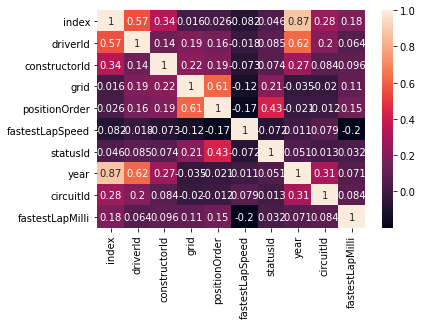

In [115]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

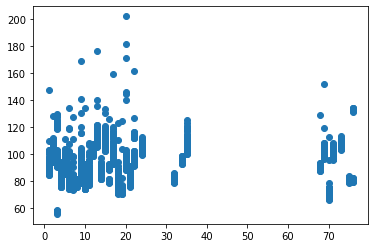

In [116]:
plt.scatter(fastest_df['circuitId'],fastest_df['fastestLapMilli'])

<AxesSubplot:title={'center':'fastestLapMilli'}, xlabel='[circuitId]'>

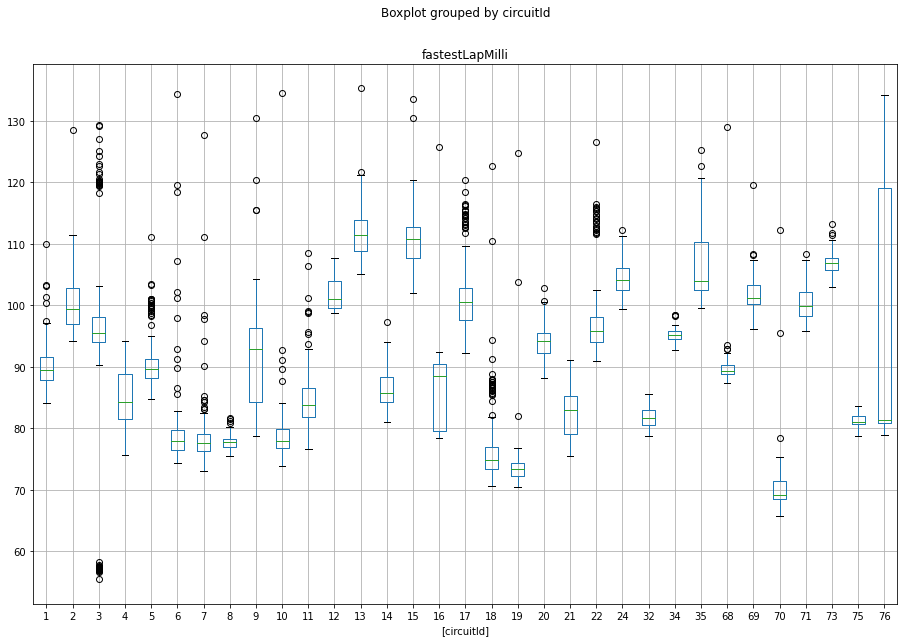

In [122]:
smallfastest_df = fastest_df[fastest_df['fastestLapMilli']<=140]

smallfastest_df.boxplot(column=['fastestLapMilli'],by=['circuitId'],figsize=(15,10))

In [121]:
fastest_df['fastestLapMilli'].describe()

count    6627.000000
mean       91.416222
std        12.513626
min        55.404000
25%        81.055500
50%        90.783000
75%       100.319000
max       202.300000
Name: fastestLapMilli, dtype: float64